In [43]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
data_dir= Path('practical-statistics-for-data-scientists/data')

# Random Sampling

- **Sample**<br>
A subset from a larger data set.<br>

- **Population**<br>
The larger data set or idea of a data set.<br>
- **N (n)**<br>
The size of the population (sample).<br>
- **Random sampling**<br>
Drawing elements into a sample at random.<br>
- **Stratified sampling**<br>
Dividing the population into strata and randomly sampling from each strata.
- **Stratum (pl., strata)**<br>
A homogeneous subgroup of a population with common characteristics.<br>
- **Simple random sample**<br>
The sample that results from random sampling without stratifying the
population.<br>
- **Bias**<br>
Systematic error.<br>
- **Sample bias**<br>
A sample that misrepresents the population<br>

# Sampling Distribution

- **Sample statistic**<br>
A metric calculated for a sample of data drawn from a larger population.<br>

- **Data distribution**<br>
The frequency distribution of individual values in a data set.<br>
- **Sampling distribution**<br>
The frequency distribution of a sample statistic over many samples or resamples.<br>
- **Central limit theorem**<br>
The tendency of the sampling distribution to take on a normal shape as sample
size rises.<br>
- **Standard error**<br>
The variability (standard deviation) of a sample statistic over many samples (not
to be confused with standard deviation, which by itself, refers to variability of
individual data values).


# CLT
The means drawn from multiple samples will resemble the familiar bell-shaped nor‐
mal curve even if the source population is not normally distributed, provided that 
1. the sample size is large enough 
2. the
departure of the data from normality is not too great.

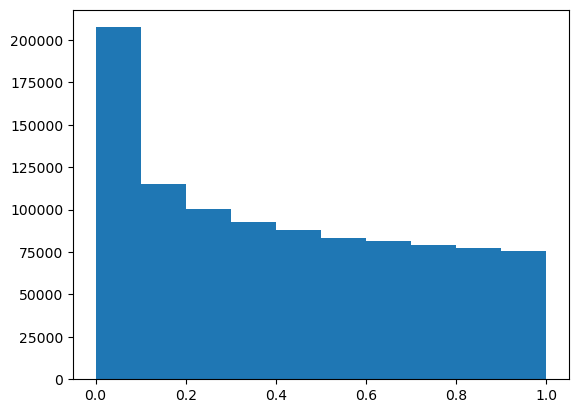

In [44]:
pop= np.random.random(size= (1_000_000, ))
pop[:500_000]= pop[:500_000] ** 2
plt.hist(x= pop, bins= 10)
plt.show()

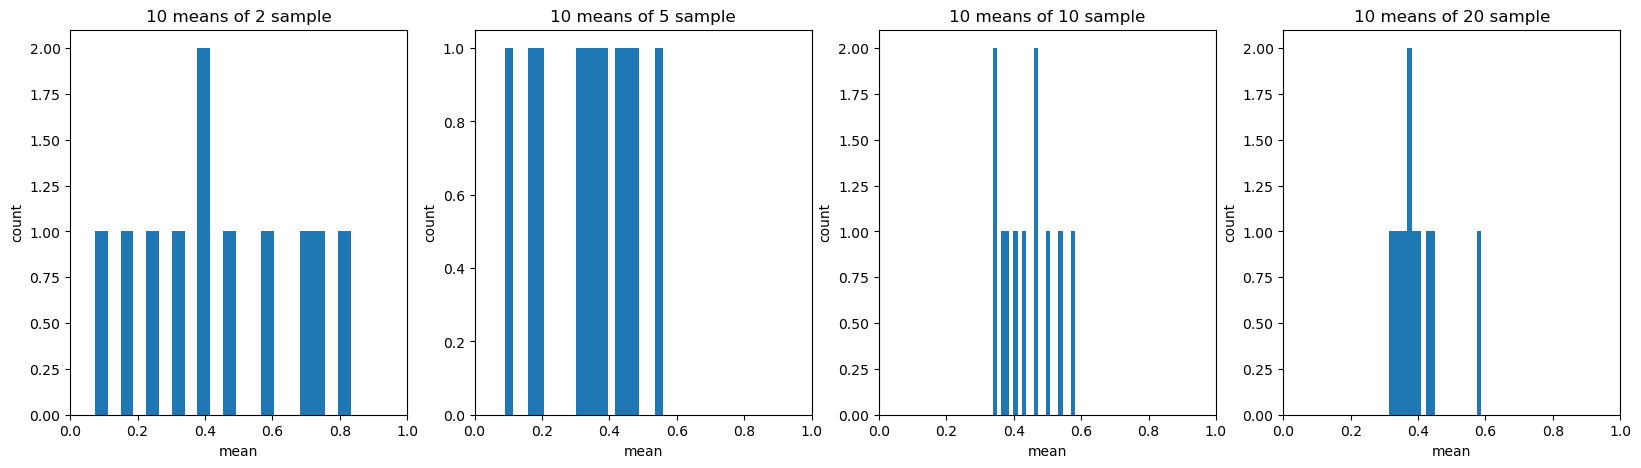

In [45]:
n_sample= [2, 5, 10, 20] # number of sample
n_sampling= range(11) # number we do sampling
k= 1

plt.figure(figsize= (20, 5))

for i in n_sample:
    means= [(np.random.choice(pop, size= i).mean()) for j in n_sampling]
    plt.subplot(1, 4, k)
    plt.hist(x= means, bins= 20)
    plt.xlim(0, 1)
    plt.title(f'{n_sampling[-1]} means of {i} sample')
    plt.xlabel('mean')
    plt.ylabel('count')
    k= k+1

plt.show()

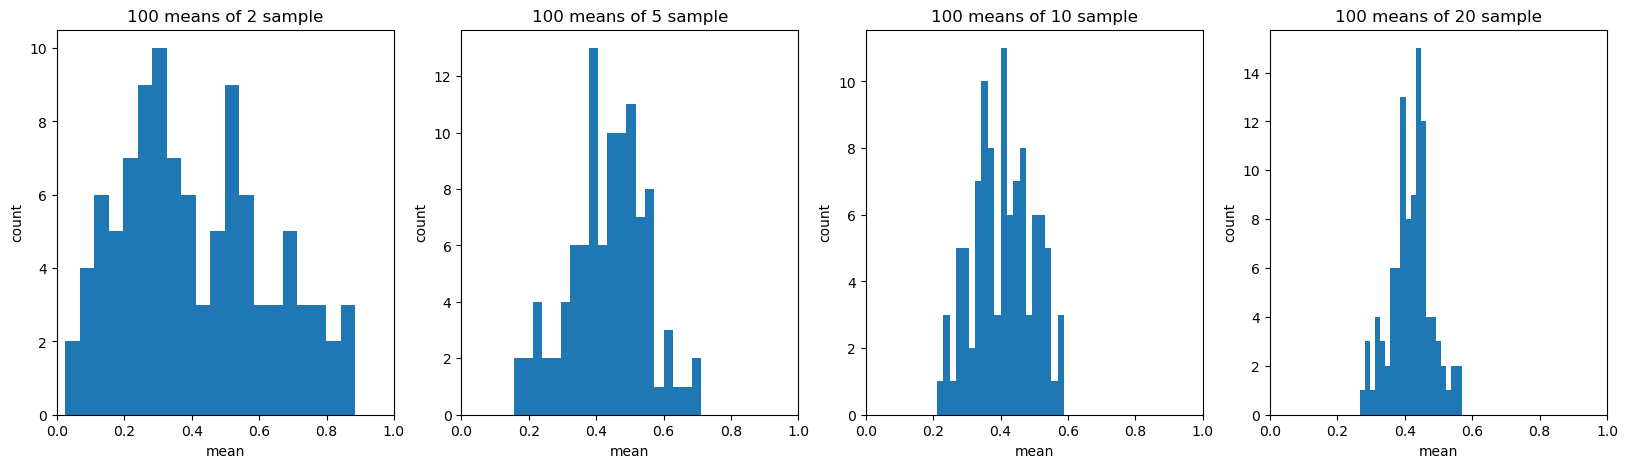

In [46]:
n_sample= [2, 5, 10, 20] # number of sample
n_sampling= range(101) # number we do sampling
k= 1

plt.figure(figsize= (20, 5))

for i in n_sample:
    means= [(np.random.choice(pop, size= i).mean()) for j in n_sampling]
    plt.subplot(1, 4, k)
    plt.hist(x= means, bins= 20)
    plt.xlim(0, 1)
    plt.title(f'{n_sampling[-1]} means of {i} sample')
    plt.xlabel('mean')
    plt.ylabel('count')
    k= k+1

plt.show()

# Bootstrap

- **Bootstrap sample**<br>
A sample taken with replacement from an observed data set.<br>

- **Resampling**<br>
The process of taking repeated samples from observed data; includes both boot‐
strap and permutation (shuffling) procedures.

The
algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:<br>
1. Draw a sample value, record it, and then replace it.<br>
2. Repeat n times.<br>
3. Record the mean of the n resampled values.<br>
4. Repeat steps 1–3 R times.<br>
5. Use the R results to:<br>
    1. Calculate their standard deviation (this estimates sample mean standard
error).<br>
    2. Produce a histogram or boxplot.<br>
    3. Find a confidence interval.<br>

In [47]:
loans_income= pd.read_csv(data_dir / 'loans_income.csv')
print(len(loans_income))
print(np.median(loans_income.x))
loans_income.head()

50000
62000.0


,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [48]:
from sklearn.utils import resample

results= []
for nrepeat in range(1_000):
    sample= resample(loans_income) # n_sample= len(loans_income)
    results.append(sample.median().values[0])
results= pd.Series(results)

In [49]:
print('Bootstrap Statistics:')
print(f'original: {loans_income.median().values}')
print(f'bootstrap: {results.mean()}')
print(f'bias: {results.mean() - loans_income.median().values}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: [62000.]
bootstrap: 61917.0625
bias: [-82.9375]
std. error: 219.75775598386753


# Confidence Interval

- **Confidence level**<br>
The percentage of confidence intervals, constructed in the same way from the
same population, that are expected to contain the statistic of interest.<br>

- **Interval endpoints**<br>
The top and bottom of the confidence interval.

> One way to think of a 90% confidence interval is as follows:
it is the interval that encloses the central 90% of the bootstrap sampling distribution
of a sample statistic

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:<br>
1. Draw a random sample of size n with replacement from the data (a resample).<br>
2. Record the statistic of interest for the resample.<br>
3. Repeat steps 1–2 many (R) times.<br>
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution.<br>
5. The trim points are the endpoints of an x% bootstrap confidence interval<br>

pop mean: 68760.51844
num of pop: 50000


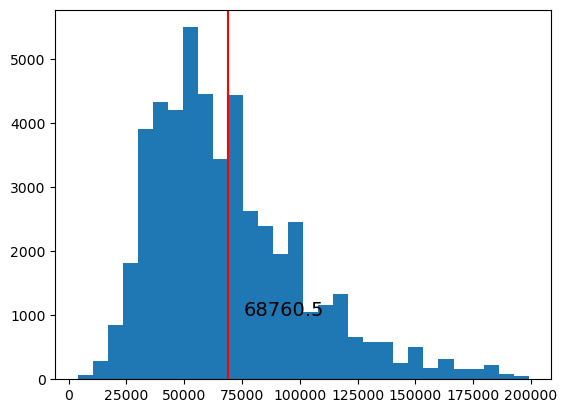

In [50]:
print(f'pop mean: {loans_income.x.mean()}')
print(f'num of pop: {len(loans_income)}')

plt.hist(loans_income['x'], bins= 30)
plt.axvline(
    x= loans_income.x.mean(),
    color= 'red'
)
plt.text(
    x= loans_income.x.mean() * 1.1,
    y= 1000,
    s= round(loans_income.x.mean(), 1),
    fontsize= 14,
)
plt.show()

num of sample: 100
num of bootstrapping: 1000


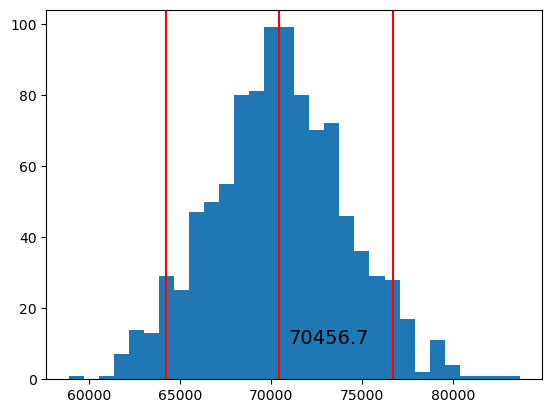

In [51]:
# take original sample from population
loans_income_sample= np.random.choice(loans_income['x'], size= 100)
n_sampling= 1_000 # number of bootstrapping
sample_means= []

for i in range(n_sampling):
    sample_mean= resample(loans_income_sample).mean()
    sample_means.append(sample_mean)

print(f'num of sample: {len(loans_income_sample)}')
print(f'num of bootstrapping: {len(sample_means)}')

plt.hist(x= sample_means, bins= 30)

def Average(lst):
    return sum(lst) / len(lst)

plt.axvline(x= Average(sample_means), color= 'red')

a, b= np.quantile(sample_means, q= [0.05, 0.95])
plt.axvline(x= a, color= 'red')
plt.axvline(x= b, color= 'red')

plt.text(
    x= Average(sample_means) + 500,
    y= 10,
    s= round(Average(sample_means), 1),
    fontsize= 14,
)
plt.show()

In [52]:
a, b= np.quantile(sample_means, q= [0.05, 0.95])

# Normal Distribution

- **Error**<br>
The difference between a data point and a predicted or average value.<br>

- **Standardize**<br>
Subtract the mean and divide by the standard deviation.<br>
- **z-score**<br>
The result of standardizing an individual data point.<br>
- **Standard normal**<br>
A normal distribution with mean = 0 and standard deviation = 1.<br>
- **QQ-Plot**<br>
A plot to visualize how close a sample distribution is to a specified distribution,
e.g., the normal distribution<br>

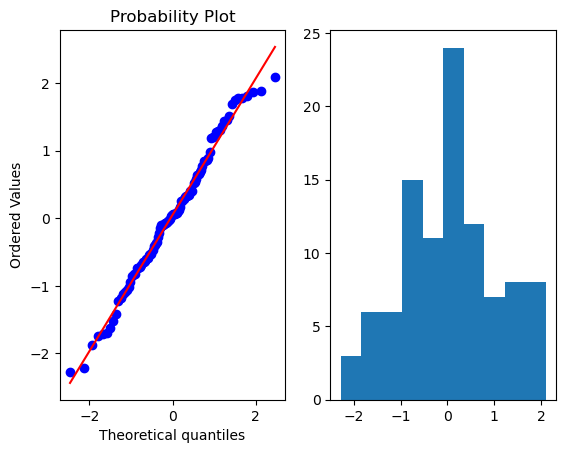

In [53]:
# qqplot

from scipy import stats
norm_sample = stats.norm.rvs(size=100)

ax= plt.subplot(1, 2, 1)
stats.probplot(norm_sample, plot= ax)

ax2= plt.subplot(1, 2, 2)
ax2= plt.hist(norm_sample)

plt.show()

## Long-Tailed Distribution

- **Tail**<br>
The long narrow portion of a frequency distribution, where relatively extreme
values occur at low frequency.<br>

- **Skew**<br>
Where one tail of a distribution is longer than the othe

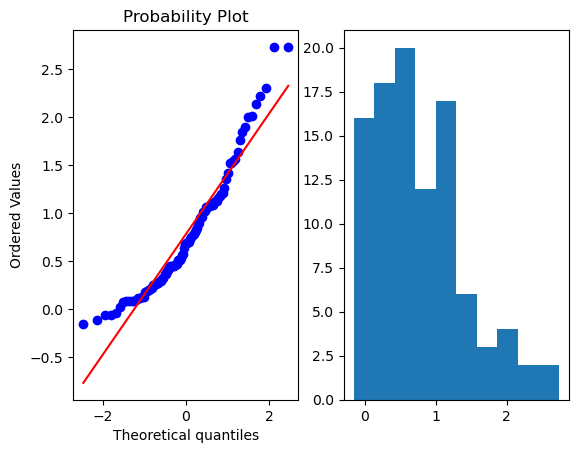

In [54]:
# qqplot

from scipy import stats
skewed_sample = stats.skewnorm.rvs(size= 100, a=10)

ax= plt.subplot(1, 2, 1)
stats.probplot(skewed_sample, plot= ax)

ax2= plt.subplot(1, 2, 2)
ax2= plt.hist(skewed_sample)

plt.show()

## Student's t-Distribution

- **n**<br>
Sample size.<br>

- **Degrees of freedom**<br>
A parameter that allows the t-distribution to adjust to different sample sizes, sta‐
tistics, and numbers of groups

# Binomial Distribution

- **Trial**<br>
An event with a discrete outcome (e.g., a coin flip).<br>

- **Success**<br>
The outcome of interest for a trial.<br>
Synonym: “1” (as opposed to “0”)<br>
- **Binomial**<br>
Having two outcomes.<br>
Synonyms: yes/no, 0/1, binary<br>
- **Binomial trial**<br>
A trial with two outcomes.<br>
Synonym: Bernoulli trial<br>
- **Binomial distribution**<br>
Distribution of number of successes in x trials.<br>
Synonym: Bernoulli distribution<br>

In [55]:
# the probability of observing exactly x = 2 successes 
# in size = 5 trials
# where the probability of success for each trial is p = 0.1

stats.binom.pmf(2, n= 5, p= 0.1)

0.07289999999999992

In [56]:
# the probability of observing exactly x = 0 successes 
# in size = 200 trials
# where the probability of success for each trial is p = 0.02

stats.binom.pmf(0, n= 200, p= 0.02)

0.017587946605721567

In [57]:
# the probability of observing two or fewer successes 
# in five trials, 
# where the probability of success for each trial is 0.1.

stats.binom.cdf(2, n= 5, p= 0.1)

0.99144

# Chi-Square Distribution

# f-Fistribution

# Poisson Distribution

The frequency distribution of the number of events in sampled units of time or space.<br>

- Lambda<br>
The rate (per unit of time or space) at which events occur.<br>

> A key assumption in any simulation study for either the Poisson or exponential distri‐
bution is that the rate, λ, remains constant over the period being considered.<br>

“How much capacity do we need to be
95% sure of fully processing the internet traffic that arrives on a server in any fiv second period?”

In [58]:
stats.poisson.rvs(2, size=100)

# generate 100 random numbers from a Poisson distribution with λ = 2.
# For example, if incoming customer service calls average two per minute, this code
# will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

array([2, 2, 1, 0, 2, 5, 1, 2, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 0, 1, 4, 1,
       2, 3, 1, 1, 0, 5, 4, 2, 3, 2, 3, 1, 0, 0, 3, 5, 1, 2, 2, 1, 6, 3,
       1, 2, 2, 3, 3, 2, 1, 1, 0, 2, 1, 3, 1, 0, 2, 2, 6, 1, 0, 3, 7, 2,
       4, 0, 1, 3, 3, 2, 2, 3, 3, 1, 0, 1, 4, 3, 3, 2, 1, 2, 2, 1, 4, 1,
       1, 2, 2, 2, 1, 1, 6, 4, 2, 2, 1, 3])

# Exponential Distribution

> A key assumption in any simulation study for either the Poisson or exponential distri‐
bution is that the rate, λ, remains constant over the period being considered.<br>

In [59]:
stats.expon.rvs(0.2, size= 100)
# This code would generate 100 random numbers from an exponential distribution
# where the mean number of events per time period is 0.2. So you could use it to simu‐
# late 100 intervals, in minutes, between service calls, where the average rate of incom‐
# ing calls is 0.2 per minute

array([0.33184924, 0.41755378, 2.73282227, 0.63504603, 0.50262004,
       1.3821544 , 0.70862254, 1.89444017, 0.66202191, 0.3047423 ,
       3.83867426, 0.5336538 , 1.27477365, 0.56797514, 0.27960797,
       1.66205302, 0.69269065, 0.32379398, 0.70803594, 0.53552   ,
       0.67575621, 0.68341408, 0.39868821, 0.7577701 , 0.46210503,
       1.59373027, 6.37260255, 1.54247797, 1.28665228, 0.59159284,
       0.59643329, 1.31621763, 0.62525212, 0.20892242, 4.820342  ,
       0.27266432, 2.65353515, 1.25231004, 1.13003926, 1.09528488,
       1.51501939, 1.66766144, 0.34479784, 4.18588363, 1.17234758,
       3.70567587, 0.62578134, 3.81358959, 0.22991865, 0.85266494,
       1.3707544 , 0.27508031, 1.1671738 , 0.77925604, 0.55569139,
       1.82638782, 0.62487061, 2.28255114, 2.04034295, 1.59471343,
       0.22799894, 0.26461962, 2.12791387, 1.18094049, 3.91651518,
       0.35497034, 1.38899737, 0.62631885, 0.5264212 , 2.68347221,
       0.8297541 , 0.27714522, 4.09849102, 0.8201645 , 0.53021

# Weibull Distribution

In [60]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

# generate 100 random numbers (lifetimes) from a Wei‐
# bull distribution with shape of 1.5 and characteristic life of 5,000

array([ 3186.6162556 ,  4638.61930185,  6674.11280608,   528.90762626,
        5456.5240808 ,  1620.76499896,  2515.41817188,  5766.89140599,
        3424.71517029,   618.47575035, 14805.29333248,  1058.62147414,
        1796.76857765,  1041.16144791,  5962.34199114,   327.92229078,
        6142.73892375,   566.84777306,  8294.11781256,  2631.24872021,
        1658.75970269,  4118.95093415,   838.34472599,  4177.15441645,
        2372.94100067,  9302.67063781,  7154.56614998,   894.81788812,
        6096.51731057,  8023.08938714, 13911.73498974,  7464.07535722,
        4053.06971316, 11313.94109699,  3796.09687   ,  5569.56788074,
        7982.28273076,  7173.84925185,  5785.11606691,  6063.31943587,
        3489.36519336,  1783.01042176,  8513.29215748,  7497.1965293 ,
        2010.6763392 ,  5835.02780846,  3701.34683839,  3953.2112983 ,
        2833.17220721,  1752.48401464,   833.31419539,  5650.8609296 ,
        2707.17312568,  3804.80441137,  5118.1538687 ,  2618.89977729,
      